<a href="https://colab.research.google.com/github/hpsuresh12345/Autoreview/blob/master/Tweepy_18Oct2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
#Create document list
tweets = pd.read_excel("Tweets_Infotainment_DashCam_15Oct2019.xlsx")
tweets.info()
tweets.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
Tweets      207 non-null object
Category    207 non-null object
dtypes: object(2)
memory usage: 3.3+ KB


,Tweets,Category
0,Our Top Pick of The Best Parking Mode Dash Cam...,Positive
1,Still watching #Russian #dashcam compilations ...,Neutral
2,Check out this great travel dash cam for your ...,Positive
3,Shortcut! #trafficcircle #dashcam https://t.co...,Neutral
4,Our DMS alarms include:\n①Closed Eyes\n②Yawnin...,Neutral
5,Dash cam video shows the importance of having ...,Neutral
6,Check out this great travel dash cam for your ...,Positive
7,When your friend invites you over for tea at h...,Neutral
8,Monash Freeway 30 mins ago. Australia where ar...,Neutral
9,@lovedasauto @TorgutM @MailOnline @Sytner @BMW...,Negative


In [0]:
#Magic Command to print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [112]:
print('Dataset size:',tweets.shape)
print('Columns are:',tweets.columns)

Dataset size: (207, 2)
Columns are: Index(['Tweets', 'Category'], dtype='object')


In [113]:
tweets_text.head()
print(len(tweets))

0    Our Top Pick of The Best Parking Mode Dash Cam...
1    Still watching #Russian #dashcam compilations ...
2    Check out this great travel dash cam for your ...
3    Shortcut! #trafficcircle #dashcam https://t.co...
4    Our DMS alarms include:\n①Closed Eyes\n②Yawnin...
Name: Tweets, dtype: object

207


In [114]:
# examine the class distribution
tweets.Category.value_counts().sort_index()

Negative     21
Neutral      71
Positive    115
Name: Category, dtype: int64

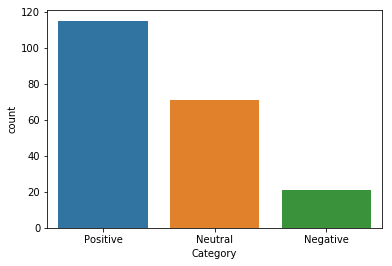

In [115]:
sns.countplot(x = 'Category', data = tweets)

In [116]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


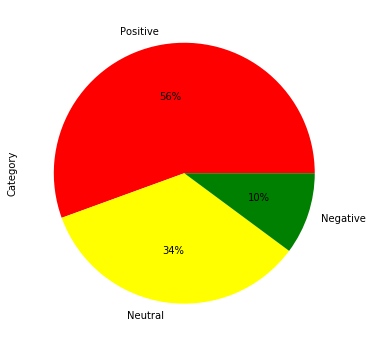

In [117]:
tweets.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [118]:
#tweets = data['Tweet']
#labels = data['Category']
#tweets.shape
tweets_text=tweets.Tweets
tweets_text.head()
print(len(tweets_text))

0    Our Top Pick of The Best Parking Mode Dash Cam...
1    Still watching #Russian #dashcam compilations ...
2    Check out this great travel dash cam for your ...
3    Shortcut! #trafficcircle #dashcam https://t.co...
4    Our DMS alarms include:\n①Closed Eyes\n②Yawnin...
Name: Tweets, dtype: object

207


In [119]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 207): # iterate through the list of 1000 tweets
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  tweets_text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',tweets_text[i])
  # convert all words to lower case
  tweets_text_cln = tweets_text_cln.lower()
  # split sentences into words
  tweets_text_cln = tweets_text_cln.split()
  # remove English stop words
  tweets_text_cln = [x for x in tweets_text_cln if not x in stop_words]
  # stem words to the base form
  #tweets_text_cln = [ps.stem(x) for x in tweets_text_cln]
  # join words to form the original sentences
  tweets_text_cln = " ".join(tweets_text_cln)
  # append to the list to get all Tweets in one place
  corpus.append(tweets_text_cln)
#print(corpus) 

In [0]:
bagofwords=[]
for i in range (0,207):
    words = corpus[i].split()
    bagofwords.append(words)

In [122]:
bagofwords[0]

['top', 'pick', 'best', 'parking', 'mode', 'dash', 'cams', 'dashcam']

In [123]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['top', 'pick', 'best', 'parking', 'mode', 'dash', 'cams', 'dashcam', 'still', 'watching']

Most commonly occuring words and frequency



[('dashcam', 117),
 ('dash', 71),
 ('cam', 58),
 ('great', 46),
 ('driving', 41),
 ('check', 40),
 ('travel', 39),
 ('journey', 38),
 ('ease', 35),
 ('worries', 30),
 ('car', 20),
 ('camera', 18),
 ('via', 15),
 ('p', 15),
 ('one', 12),
 ('driver', 12),
 ('video', 10),
 ('road', 10),
 ('footage', 10),
 ('new', 9)]

In [124]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df.head(10)

,words,Freq
0,dashcam,117
1,dash,71
2,cam,58
3,great,46
4,driving,41
5,check,40
6,travel,39
7,journey,38
8,ease,35
9,worries,30


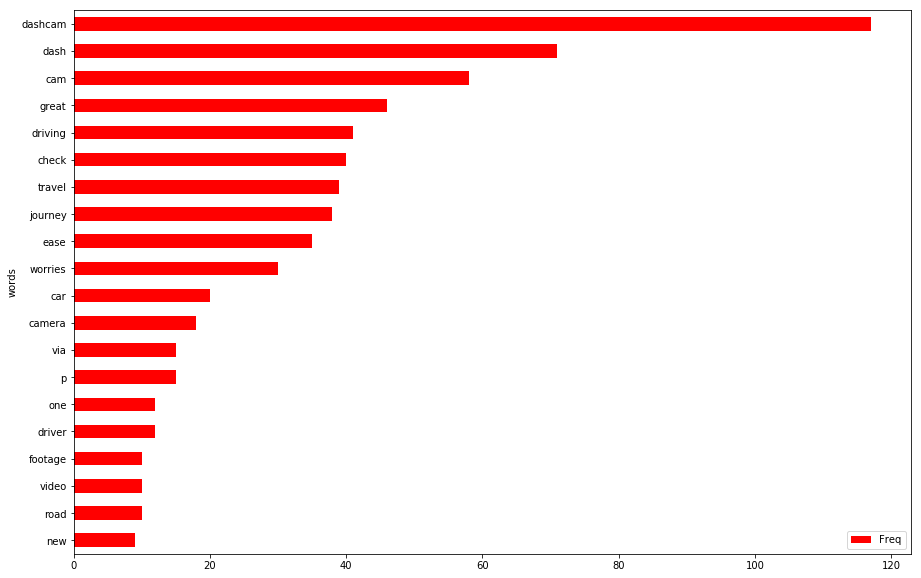

In [125]:
fig,ax=plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='red')
plt.show();

In [0]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='black',
                     max_words=20
                      ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

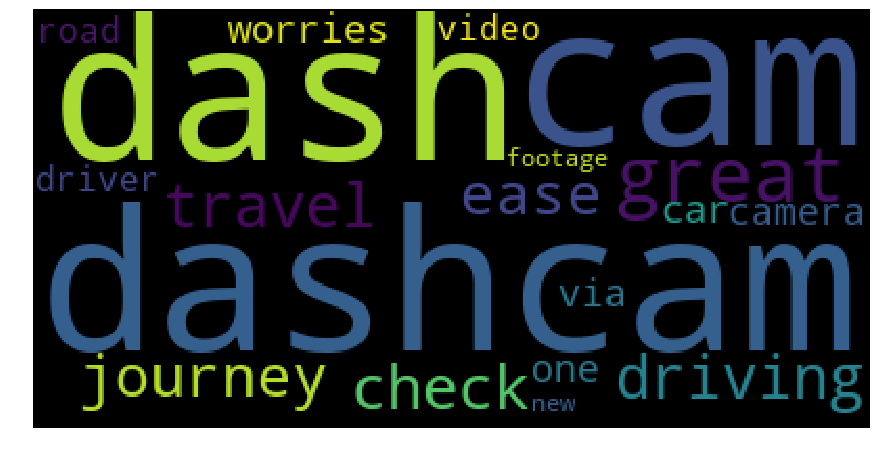

In [127]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [128]:
from textblob import TextBlob
sentiment_text=[TextBlob(tweet) for tweet in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.75
top pick best parking mode dash cams dashcam


In [129]:
sentiments = [[tweet.sentiment.polarity,str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','Tweet_Text'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,Tweet_Text
161,0.850000,impressive quality recording dashcam dashcamer...
206,0.800000,check great travel dash cam journey gstaad cra...
22,0.800000,check great travel dash cam journey misawa tok...
153,0.800000,check great travel dash cam journey durban gro...
25,0.800000,drowsy distracted driving greatly increases ch...
132,0.800000,check great travel dash cam journey lourdes ca...
27,0.800000,check great travel dash cam journey sheffield ...
28,0.800000,check great travel dash cam journey ballina we...
116,0.800000,check great travel dash cam journey alicante c...
113,0.800000,check great travel dash cam journey playa de l...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c7de2dac8>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution in Tweet data')

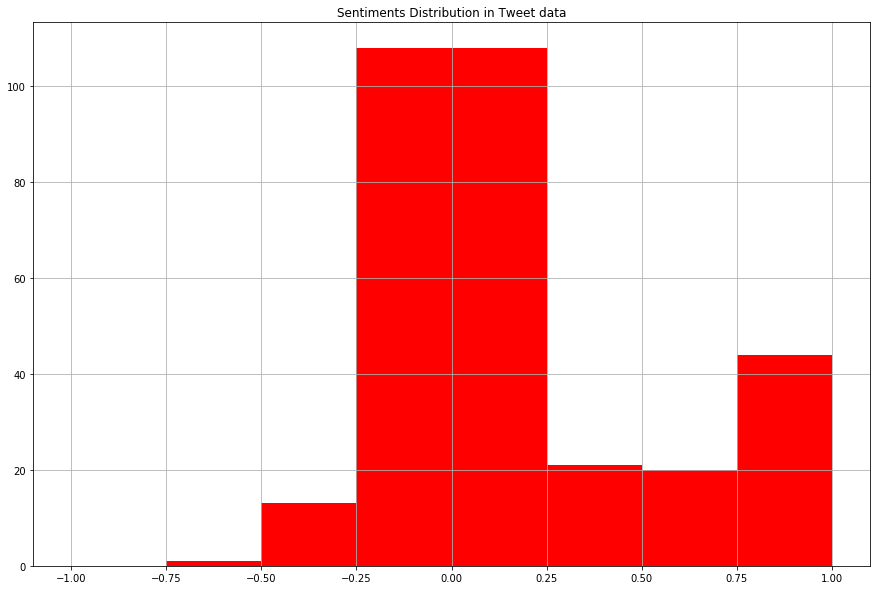

In [130]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='red')
plt.title('Sentiments Distribution in Tweet data')
plt.show()

In [0]:
lex_file = open("AFINN-111.csv")

In [0]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):# for record in (tweets):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [133]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'\ufeffabandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3

In [0]:
strength = []
for tweet in word_list:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [0]:
senti_matrix = pd.DataFrame(strength, tweets_text)


In [136]:
senti_matrix[0:10]

,0
Tweets,
Our Top Pick of The Best Parking Mode Dash Cams - #dashcam - https://t.co/OZHvEVVXtR https://t.co/SGtPIzx6ml,5
Still watching #Russian #dashcam compilations and “#meanwhileinrussia” videos? You're not alone: https://t.co/DYbPbH4QBq,-2
Check out this great travel dash cam for your journey to Brighton from Worthing and ease your driving worries… https://t.co/w8Sb5mcNW0,5
Shortcut! #trafficcircle #dashcam https://t.co/JVp813qJsT,0
Our DMS alarms include:\n①Closed Eyes\n②Yawning\n③Inattention\n④Head Down\n⑤Calling\n⑥Smoking\n⑦Long Time Driving\nEmail: s… https://t.co/BY7D0sVxIm,0
Dash cam video shows the importance of having one in your car as scammer caught on camera: https://t.co/ppdtZazyi3… https://t.co/m7CxscqxeK,2
Check out this great travel dash cam for your journey to Tenby Pembrokeshire from Bridgend and ease your driving wo… https://t.co/2zooqBlCfy,5
When your friend invites you over for tea at her new house and she didn’t tell you she moved into a mansion in San… https://t.co/dY7aEhKC4E,0
Monash Freeway 30 mins ago. Australia where are you traffic cameras to catch these hoon drivers and keep our roads… https://t.co/s4WYnxgFcb,0


In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(corpus).toarray()

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, tweets.Category, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(165, 24)
(42, 24)
(165,)
(42,)


# Random forest classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictions = text_classifier.predict(X_test)

In [141]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 0  1  4]
 [ 0  4  5]
 [ 0  8 20]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.31      0.44      0.36         9
    Positive       0.69      0.71      0.70        28

    accuracy                           0.57        42
   macro avg       0.33      0.39      0.36        42
weighted avg       0.53      0.57      0.55        42

0.5714285714285714


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# import and instantiate a Multinomial Naive Bayes model

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [143]:
%time nb.fit(X_train, y_train)

CPU times: user 3.88 ms, sys: 0 ns, total: 3.88 ms
Wall time: 8.28 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)

In [145]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.5476190476190477

In [146]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 0,  3,  2],
       [ 0,  4,  5],
       [ 0,  9, 19]])